## İmport Libraries and Analyze Data

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [29]:
incomedata = pd.read_csv("income.csv")
df = incomedata.copy()
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [31]:
for column_name in df.columns:
    print("{} column unique values : \n".format(column_name))
    print(df[column_name].unique(),"\n\n")

age column unique values : 

[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87] 


workclass column unique values : 

['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked'] 


fnlwgt column unique values : 

[ 77053 132870 186061 ...  34066  84661 257302] 


education column unique values : 

['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool'] 


education.num column unique values : 

[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1] 


marital.status column unique values : 

['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 


occupation column unique values : 

['?' 'Ex

In [32]:
columns = ["workclass","native.country","occupation"]

for column_name in columns:
    counter = 0
    for i in range(len(df[column_name])):
        if df[column_name][i] == "?":
            counter+=1

    print("number of '?' in {0}:  {1}".format(column_name,counter))

number of '?' in workclass:  1836
number of '?' in native.country:  583
number of '?' in occupation:  1843


In [33]:
print(df["workclass"].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [34]:
df["workclass"].value_counts().index

Index(['Private', 'Self-emp-not-inc', 'Local-gov', '?', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype='object')

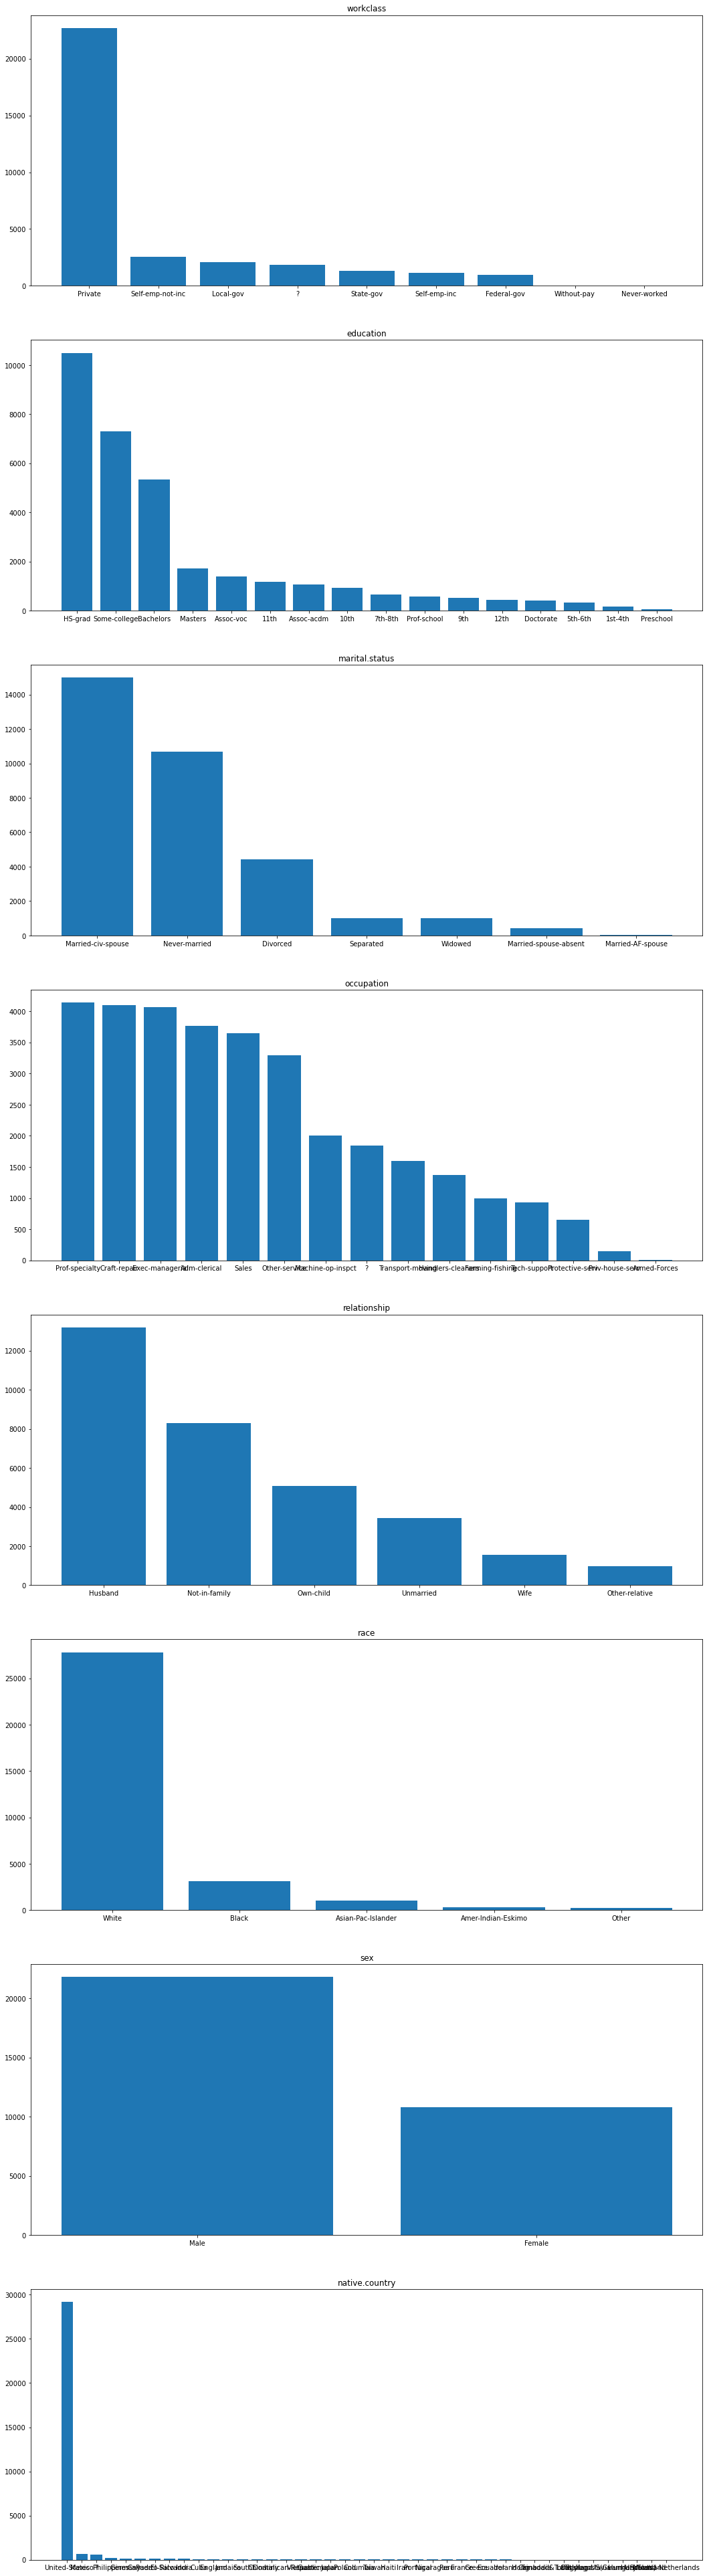

In [35]:
column_categorical = ["workclass","education","marital.status","occupation","relationship","race","sex","native.country"]

plt.figure(figsize=(18,70))

for i,column in enumerate(column_categorical):
    ax1 = plt.subplot(len(column_categorical),1,i+1)
    ax1.title.set_text(column)
    plt.bar(df[column].value_counts().index,df[column].value_counts())

## Data Preprocessing

In [36]:
# there are too many native - country features and US is great majority (%90)

counter = 0
for i in range(len(df["native.country"])):
    if df["native.country"][i] == "United-States":
        counter+=1

print("number of US in native country is :  {0}".format(counter))
print("The ratio of US to all country : {0}".format(counter/len(df["native.country"])))

# Because of this reason, split US and other country is better



number of US in native country is :  29170
The ratio of US to all country : 0.895857006848684


In [37]:
df["native.country"] = ["United-States" if x == "United-States" else "Other" for x in df["native.country"]]
print(df["native.country"].value_counts())

United-States    29170
Other             3391
Name: native.country, dtype: int64


In [38]:
# outliers
column_numeric = ["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"]

for column in column_numeric:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    under = q1 - 1.5*iqr
    over = q3 + 1.5*iqr
    outliers = df[(df[column] < under) | (df[column] > over)][column]
    values = df[(df[column] >= under) & (df[column] <= over)][column]
    
    print("in  {0}  column , number of outliers  :  {1}".format(column,(len(outliers))))
    print("in  {0}  column , the ratio of outliers to all values : {1}".format(column,(len(outliers)/len(df[column]))))

in  age  column , number of outliers  :  143
in  age  column , the ratio of outliers to all values : 0.004391757009919842
in  fnlwgt  column , number of outliers  :  992
in  fnlwgt  column , the ratio of outliers to all values : 0.030465894782101287
in  education.num  column , number of outliers  :  1198
in  education.num  column , the ratio of outliers to all values : 0.036792481803384416
in  capital.gain  column , number of outliers  :  2712
in  capital.gain  column , the ratio of outliers to all values : 0.08328982525106723
in  capital.loss  column , number of outliers  :  1519
in  capital.loss  column , the ratio of outliers to all values : 0.0466509013850926
in  hours.per.week  column , number of outliers  :  9008
in  hours.per.week  column , the ratio of outliers to all values : 0.27664998003746816


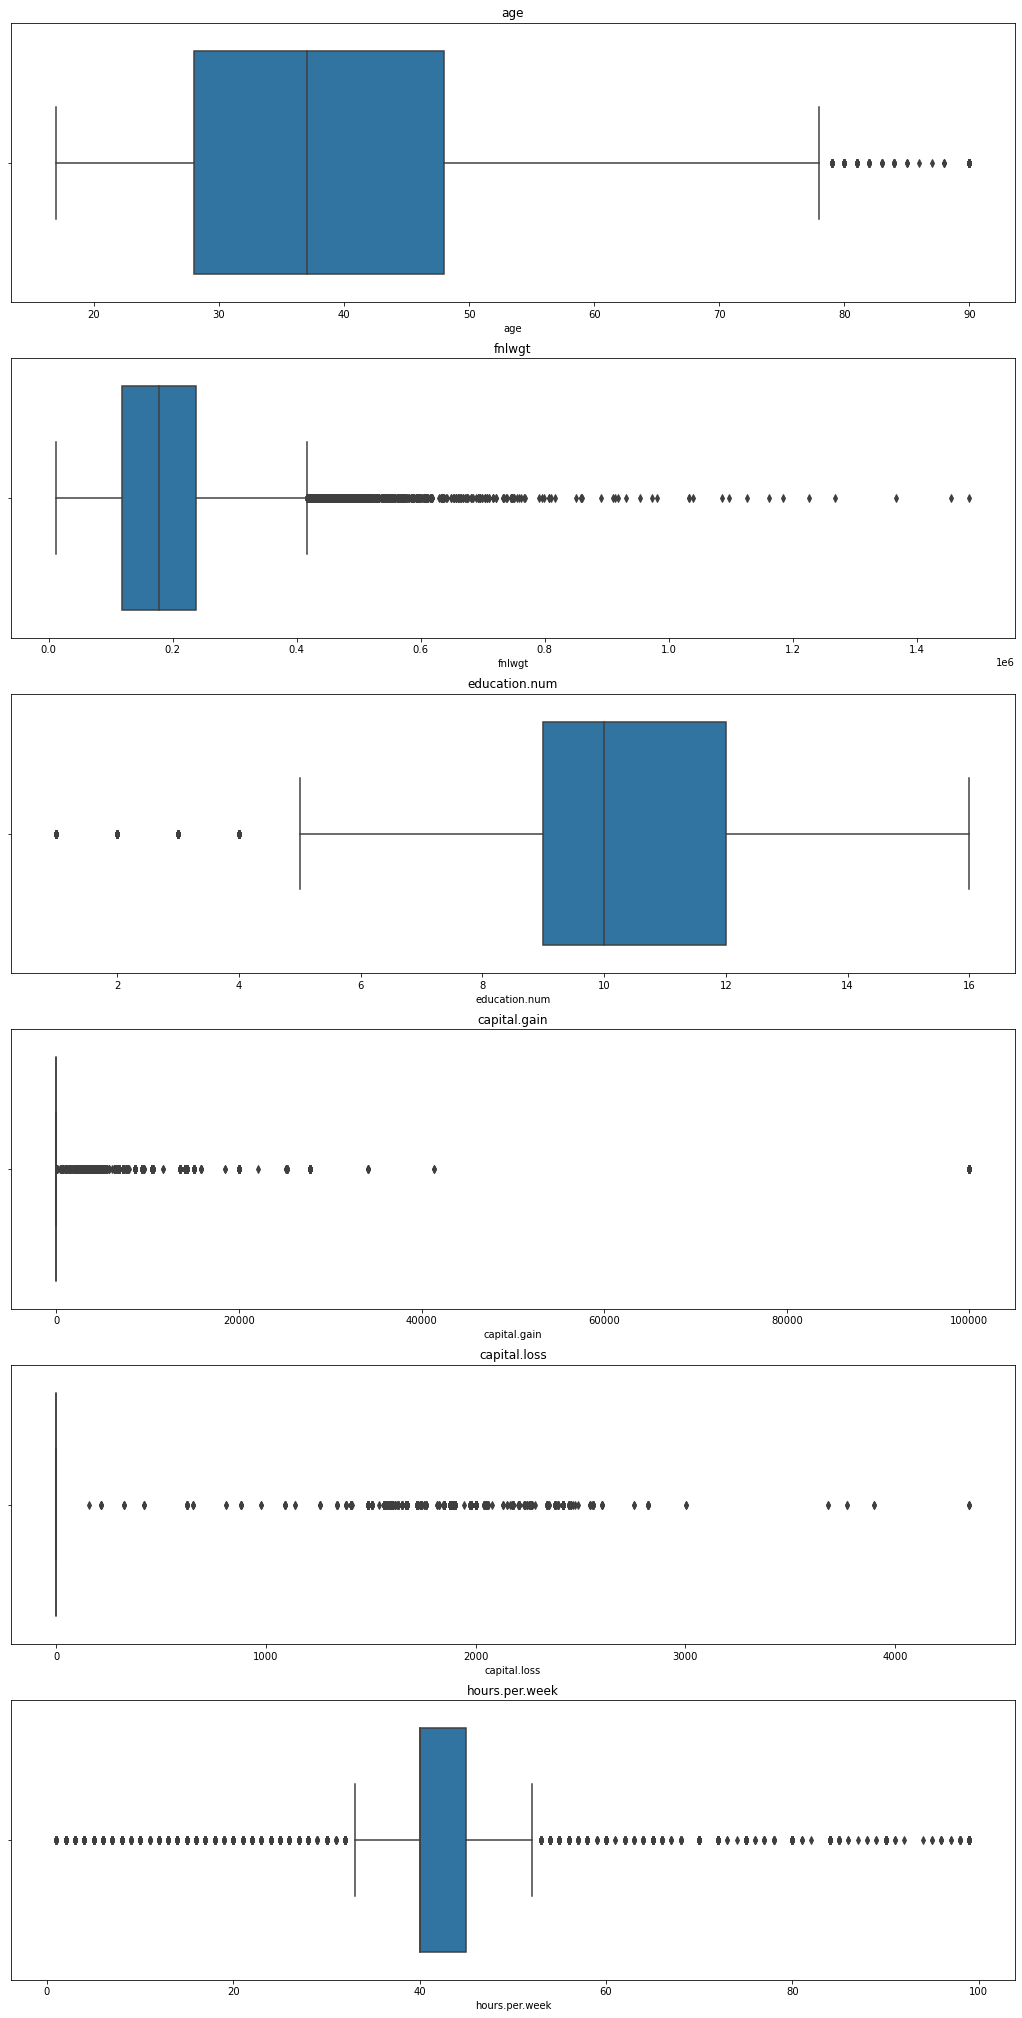

In [39]:
# boxplot

plt.figure(figsize=(18,36))

for i,column in enumerate(column_numeric):
    ax1 = plt.subplot(len(column_numeric),1,i+1)
    ax1.title.set_text(column)
    sns.boxplot(df[column])


In [40]:
# is there any value that all features are outlier:

a = df.index.values
for column in column_numeric:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    under = q1 - 1.5*iqr
    over = q3 + 1.5*iqr
    outliers = (df[(df[column] < under) | (df[column] > over)][column].index.values)
    a=np.intersect1d(a, outliers)
    print(a)
    print(len(a))


[    0     1   118   128   199   992  1180  1739  1740  1742  1761  1763
  1772  2231  2241  2296  2299  2947  3773  3776  3782  3854  4067  4133
  4134  4176  4224  4297  4600  5028  5134  5242  5896  6227  6602  6724
  7005  7117  7291  7658  7756  8318  8413  8645  8791  8810  8914  9444
  9635  9827  9984 10089 10734 10940 11078 11345 11520 11563 11645 12465
 13046 13123 13888 14001 14242 14258 14659 15057 15092 15379 15505 15548
 15549 15789 16139 16502 16552 16942 17040 17201 17603 17874 18067 18421
 18620 18833 18953 19936 20030 20144 20149 20265 20393 20621 20806 20919
 20927 20956 21192 21216 21370 21420 21857 22008 22040 22058 22059 22166
 22359 22467 22806 23220 23242 23590 23814 24183 24186 25060 25169 25339
 25376 25613 26259 26339 26865 27076 27498 28421 28753 28999 29420 29992
 30099 31218 31566 31799 31904 31923 31939 32305 32468 32500 32528]
143
[21370]
1
[]
0
[]
0
[]
0
[]
0


In [41]:
#extreme outlier numbers : 

print("capital loss : {}".format(len(df[df["capital.loss"] > 2000]["capital.loss"])))
print("capital gain : {}".format(len(df[df["capital.gain"] > 10000]["capital.gain"])))
print("fnlwgt : {}".format(len(df[df["fnlwgt"] > 0.8*1e6]["fnlwgt"])))



capital loss : 325
capital gain : 770
fnlwgt : 29


In [42]:
df = df[df["capital.loss"] <= 2000]
df = df[df["capital.gain"] <= 10000]
df = df[df["fnlwgt"] <= 0.8*1e6]
df = df.reset_index()

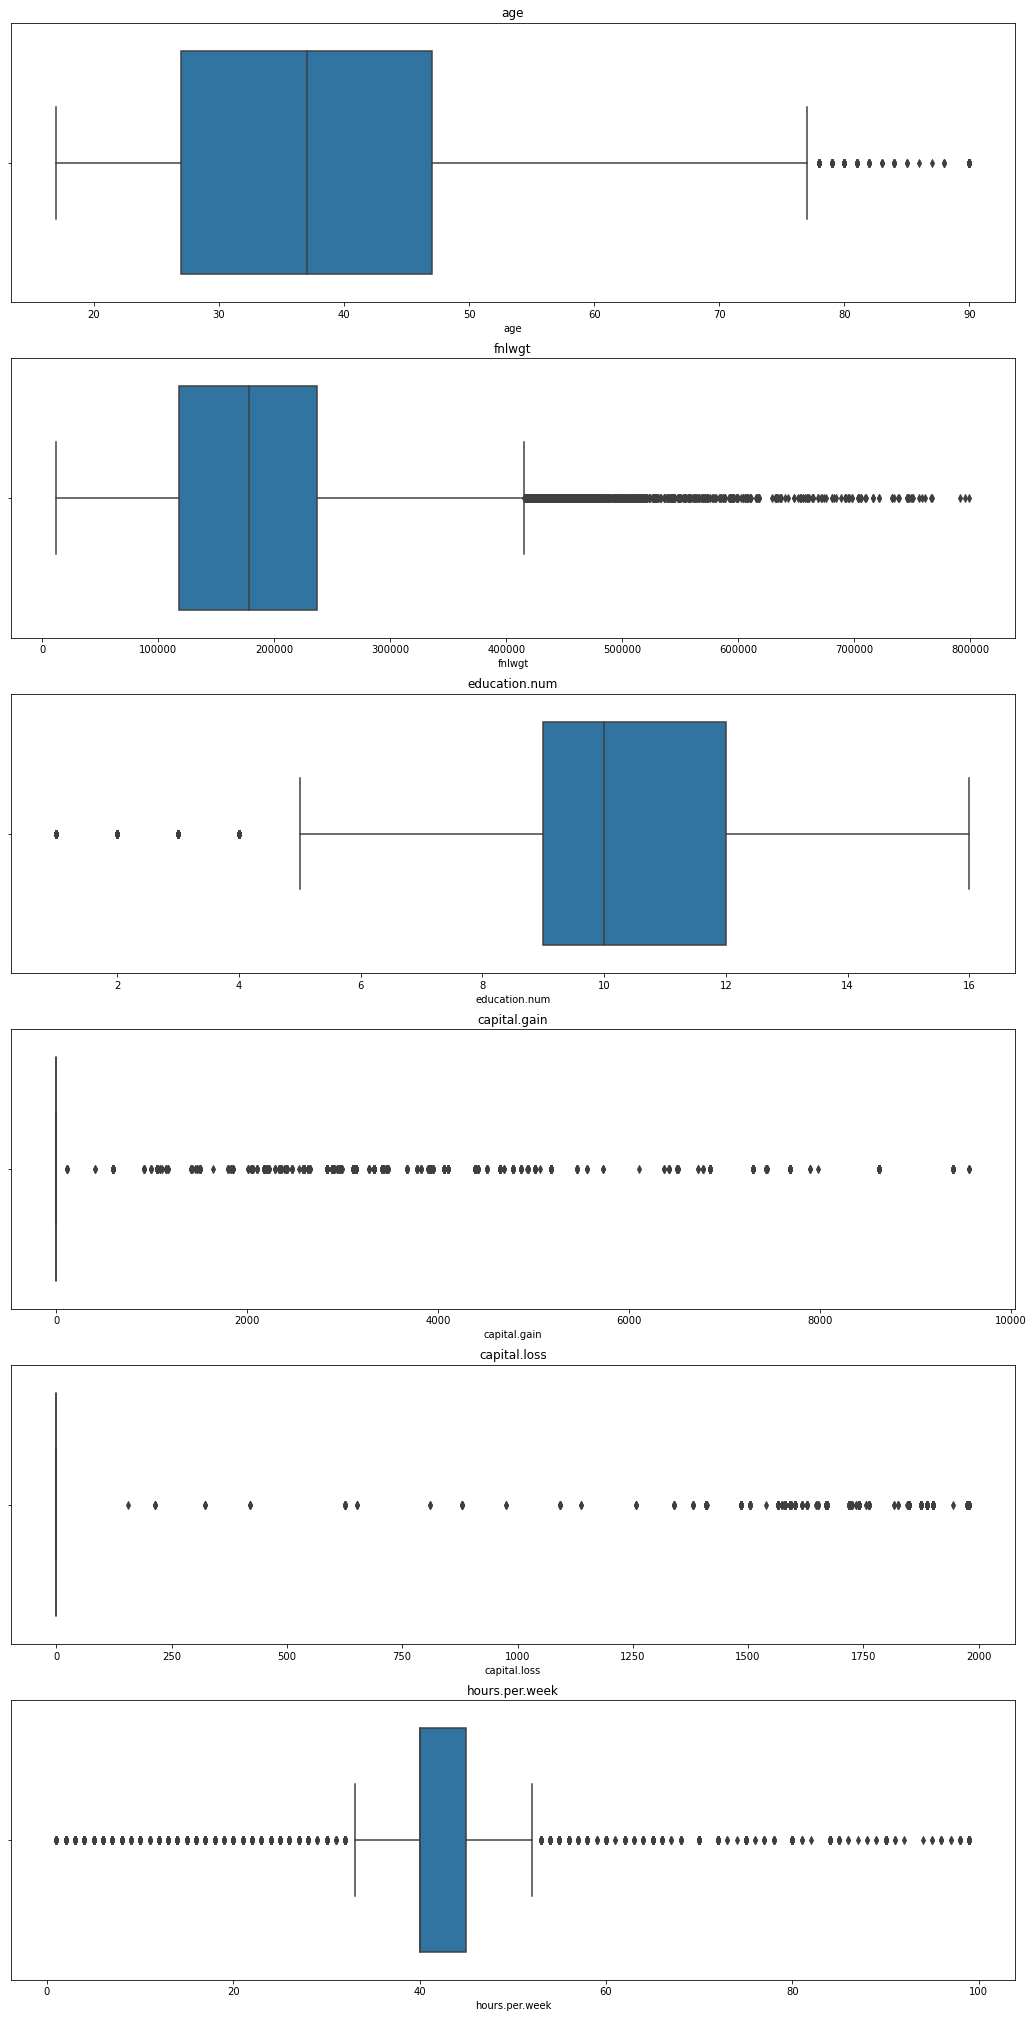

In [43]:
plt.figure(figsize=(18,36))

for i,column in enumerate(column_numeric):
    ax1 = plt.subplot(len(column_numeric),1,i+1)
    ax1.title.set_text(column)
    sns.boxplot(df[column])


In [44]:
# get dummies
for column in column_categorical:
    dummy = pd.get_dummies(df[column],drop_first=True)
    df = pd.concat([df,dummy], axis=1)
    df.drop([column], axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31438 entries, 0 to 31437
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  31438 non-null  int64 
 1   age                    31438 non-null  int64 
 2   fnlwgt                 31438 non-null  int64 
 3   education.num          31438 non-null  int64 
 4   capital.gain           31438 non-null  int64 
 5   capital.loss           31438 non-null  int64 
 6   hours.per.week         31438 non-null  int64 
 7   income                 31438 non-null  object
 8   Federal-gov            31438 non-null  uint8 
 9   Local-gov              31438 non-null  uint8 
 10  Never-worked           31438 non-null  uint8 
 11  Private                31438 non-null  uint8 
 12  Self-emp-inc           31438 non-null  uint8 
 13  Self-emp-not-inc       31438 non-null  uint8 
 14  State-gov              31438 non-null  uint8 
 15  Without-pay        

In [46]:
x = df.drop(["income"], axis = 1)
y = pd.Series(["1" if x == ">50K" else "0" for x in df["income"]]) # >50k : 1 , <=50k : 0

In [47]:
from sklearn.preprocessing import StandardScaler

x_col = x.columns 
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x,columns=x_col)

## Model Fitting

In [180]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


In [216]:
def find_scores(x, y, model):
    warnings.filterwarnings("ignore")
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)
    print("accuracy score : {}".format(accuracy_score(y_test, y_pred)))
    conf_mat = confusion_matrix(y_test, y_pred)
    conf_perc = np.array([(conf_mat[0][0])/(conf_mat[0][0]+conf_mat[0][1]),(1-(conf_mat[0][0])/(conf_mat[0][0]+conf_mat[0][1])),
             (conf_mat[1][0])/(conf_mat[1][0]+conf_mat[1][1]),(1-(conf_mat[1][0])/(conf_mat[1][0]+conf_mat[1][1]))]).reshape(2,2)
    print("confusion matrix : \n{}".format(conf_perc))
    sns.heatmap(conf_mat, annot=conf_mat, fmt="", annot_kws={'va':'bottom'}, cmap = 'copper', cbar=False)
    sns.heatmap(conf_mat, annot=conf_perc, fmt=".2f", annot_kws={'va':'top'}, cmap = 'copper', cbar=False)
    print("f1 score : {}".format(f1_score(y_test, y_pred,average="weighted")))
    print("CV score : {}".format(cross_val_score(model, x, y, cv = 10).mean()))

### Logistic Regression

accuracy score : 0.8577184054283291
confusion matrix : 
[[0.93351388 0.06648612]
 [0.41573034 0.58426966]]
f1 score : 0.8525523337483065
CV score : 0.8188512033283704


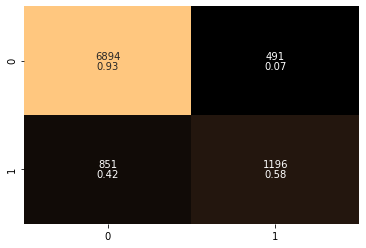

In [217]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(x_train, y_train)
y_pred = log_model.predict(x_test)
find_scores(x, y, log_model)

## KNN

accuracy score : 0.8357718405428329
confusion matrix : 
[[0.9056195  0.0943805 ]
 [0.41621886 0.58378114]]
f1 score : 0.8333934202466456
CV score : 0.8045689399036107


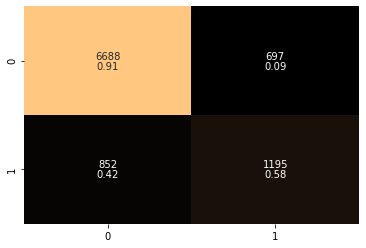

In [219]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
find_scores(x, y, knn_model)

## Neural Network

accuracy score : 0.8377862595419847
confusion matrix : 
[[0.90060934 0.09939066]
 [0.38886175 0.61113825]]
f1 score : 0.8368781194525908
CV score : 0.7862164821215043


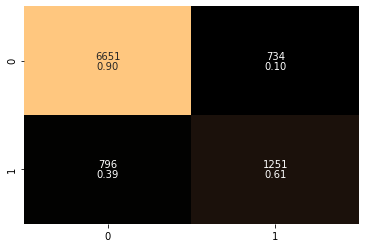

In [220]:
from sklearn.neural_network import MLPClassifier

mlpc_model = MLPClassifier().fit(x_train, y_train)
y_pred = mlpc_model.predict(x_test)
find_scores(x, y, mlpc_model)

In [207]:
# with different parameters

mlpc_params = {"alpha": [0.1, 0.01, 0.001],
              "hidden_layer_sizes": [(10,10,10),
                                     (3,5)],
              "solver" : ["lbfgs","adam","sgd"]}

mlpc_cv_model = GridSearchCV(mlpc_model, mlpc_params, cv = 2)

mlpc_cv_model.fit(x_train, y_train)
print("Best Params: " + str(mlpc_cv_model.best_params_))

Best Params: {'alpha': 0.1, 'hidden_layer_sizes': (3, 5), 'solver': 'adam'}


accuracy score : 0.8614291772688719
confusion matrix : 
[[0.92796209 0.07203791]
 [0.37860283 0.62139717]]
f1 score : 0.8581786853670648
CV score : 0.8188512033283704


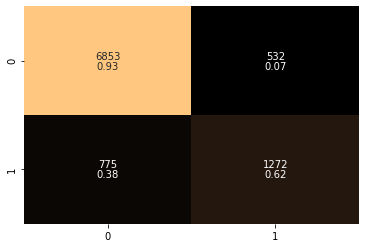

In [208]:
mlpc_last_model = MLPClassifier(alpha = 0.1, 
                           hidden_layer_sizes = (3, 5),
                          solver = "adam")
mlpc_last_model.fit(x_train, y_train)
y_pred = mlpc_last_model.predict(x_test)
find_scores(x, y, mlpc_last_model)

## Decision Tree

accuracy score : 0.8195504664970313
confusion matrix : 
[[0.8774543  0.1225457 ]
 [0.38935027 0.61064973]]
f1 score : 0.8212048338255366
CV score : 0.8188512033283704


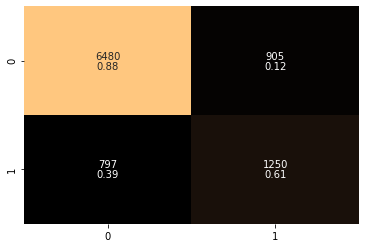

In [209]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = dtc_model.predict(x_test)
find_scores(x, y, dtc_model)

In [211]:
# Cross Validation and Parameters
dtc_params = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }
dtc_cv = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv = 5)
dtc_cv_model = dtc_cv.fit(x_train, y_train)
print("Best Params: " + str(dtc_cv_model.best_params_))

En iyi parametreler: {'max_depth': 7, 'min_samples_split': 48}


accuracy score : 0.8612171331636981
confusion matrix : 
[[0.94299255 0.05700745]
 [0.43380557 0.56619443]]
f1 score : 0.8544093151768731
CV score : 0.8188512033283704


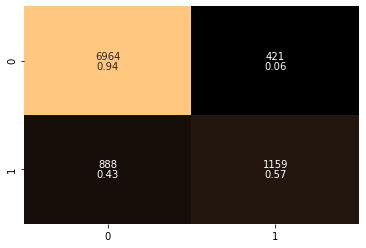

In [214]:
dtc_model_last = DecisionTreeClassifier(max_depth = 7, min_samples_split = 48).fit(x_train, y_train)
y_pred = dtc_model.predict(x_test)
find_scores(x, y, dtc_model_last)

## Random Forest

In [222]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {"max_depth": [5,10,15],
            "max_features": [8,12],
            "n_estimators": [10,500,1000],
            "min_samples_split": [5,12]}

rf_cv_model = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5)
rf_cv_model.fit(x_train, y_train)
print("Best Params: " + str(rf_cv_model.best_params_))

Best Params: {'max_depth': 15, 'max_features': 12, 'min_samples_split': 5, 'n_estimators': 500}


accuracy score : 0.8708651399491094
confusion matrix : 
[[0.95504401 0.04495599]
 [0.43282853 0.56717147]]
f1 score : 0.8630947897237217
CV score : 0.7001803555540445


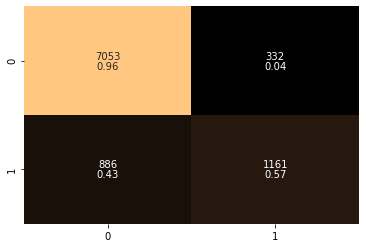

In [225]:
rf_last_model = RandomForestClassifier(max_depth = 15, 
                                  max_features = 12, 
                                  min_samples_split = 5,
                                  n_estimators = 500)

rf_last_model.fit(x_train, y_train)
y_pred = rf_last_model.predict(x_test)
find_scores(x, y, rf_last_model)